# Computational Methods in Economics

## Lecture 3 - Solving Systems of Linear Equations

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-11-08 15:53:48.955030


### Preliminaries

#### Import Modules

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import numpy as np
import scipy.optimize
import scipy.linalg

import sys
from importlib import reload

## This Lecture

- [Review: Matrices, Linear Independence, Non-Singularity](#matrix)
- [Systems of Linear Equations](#sle)
- [Solving Triangular Linear Systems](#trile)
- [LU Factorization using Gaussian Elimination](#lufac)
- [Ill-Conditioned Matrices](#ill)
- [Sparse Matrices](#sparse)
- [Iterative Methods](#iterative)

----------------------------------------------------------------------------------------------------------------------
<a id ='matrix'></a>

## Review: Matrices

Let $A$ be a m-by-n matrix:

\begin{equation}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{m1} & a_{m2} & \cdots & a_{mn}
\end{array}
\right]
\end{equation}

A n-by-n matrix is called a *square* matrix of order $n$:

\begin{equation}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]
\end{equation}

A matrix $D$ of order $n$ is *diagonal* if all its non-zero elements are on its diagonal (i.e. the entries $a_{ij}$ with $i = j$):

\begin{equation}D =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    0 & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]
\end{equation}

A matrix $L$ of order $n$ is *lower triangular* if all its non-zero elements are either diagonal entries or *strictly lower triangular* entries (i.e. the entries $a_{ij}$ for which $i > j$):

\begin{equation}L =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    a_{21} & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]
\end{equation}

A matrix $U$ of order $n$ is *upper triangular* if all its non-zero elements are either diagonal entries or *strictly upper triangular* entries (i.e. the entries $a_{ij}$ for which $i < j$):

\begin{equation}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]
\end{equation}

#### Matrices in Python

In Python, matrices are best coded as *Numpy arrays*.

In [3]:
## define matrix
A = np.array([[2, 0, -1, 2],
              [4, 2, -1, 4],
              [2, -2, -2, 3],
              [-2, 2, 7, -3]])
print(A)

[[ 2  0 -1  2]
 [ 4  2 -1  4]
 [ 2 -2 -2  3]
 [-2  2  7 -3]]


In [4]:
## get dimension of matrix
print( A.shape )

(4, 4)


In [5]:
## access elements by indices
print(A[2,1])
print(A[3,2])

-2
7


Recall that the **transpose** $A'$ (or $A^T$) of matrix $A$ is formed by replacing $a_{ij}$ with $a_{ji}$ for every $i$ and $j$. If $A = A'$, the matrix is **symmetric**. 

In [6]:
## transpose matrix
print(A.T)

[[ 2  4  2 -2]
 [ 0  2 -2  2]
 [-1 -1 -2  7]
 [ 2  4  3 -3]]


Matrix addition and scalar multiplication are straightforward:

In [7]:
## scalar multiplication
B = 3 * A
print(B)

[[ 6  0 -3  6]
 [12  6 -3 12]
 [ 6 -6 -6  9]
 [-6  6 21 -9]]


In [8]:
## matrix addition
print( A + B)

[[  8   0  -4   8]
 [ 16   8  -4  16]
 [  8  -8  -8  12]
 [ -8   8  28 -12]]


Recall that when multiplying two matrices $A$ and $B$, their product $A \cdot B$ is formed by computing the *inner product* of the $i$th row of $A$ and the $j$th column of $B$, and assigning the result to the $i,j$th element. Matrix multiplication in Python 3 is implemented using **@**.

In [9]:
## matrix multiplication
print( A @ B )

[[  -6   18   42  -15]
 [  18   42   72    3]
 [ -42   18   75  -57]
 [  72  -48 -105  102]]


Note that $AB$ and $BA$ are in general not the same. 

Also recall that multiplying a matrix $A$ with the identity matrix gives $A$.

In [10]:
## with identity matrix
print( np.eye(4) @ A )

[[ 2.  0. -1.  2.]
 [ 4.  2. -1.  4.]
 [ 2. -2. -2.  3.]
 [-2.  2.  7. -3.]]


When multiplying a matrix and a vector, make sure that the vector has the right dimension -"flat" arrays work either way!

In [11]:
x = np.array([1, 2, 3, 4])
print(A @ x)
print(x @ A)

[ 7 21  4 11]
[ 8  6 19  7]


In [12]:
## "row vector" (1-by-4)
x = np.array([[1, 2, 3, 4]])
print(x @ A) 
# print(A @ x) # this one won't work!

[[ 8  6 19  7]]


In [13]:
## "column vector" (4-by-1)
x = np.array([[1], [2], [3], [4]])
print(A @ x) 
# print(x @ A) # this one won't work!

[[ 7]
 [21]
 [ 4]
 [11]]


----------------------------------------------------------------------------------------------------------------------
<a id ='span'></a>

### Review: Span and Linear Independence

For what follows below, it is useful to review the definition of linear independence of a collection of *vectors*. For this, we first need to define a *span*.

#### Span

Let $A$ be a collection of (column) vectors: $A = \{ a_1, a_2, ..., a_n \}$ where

\begin{equation}a_j =
\left[
\begin{array}{c}
    a_{1j} \\
    a_{2j}  \\
    \vdots \\
    a_{mj} 
\end{array}
\right] \in \mathbb{R}^m
\end{equation}

$y \in \mathbb{R}^m$ is a **linear combination** of $A$ if 

\begin{equation}
    y = \beta_1 a_1 + \beta_2 a_2 + ... + \beta_n a_n
\end{equation}

for some (scalar) coefficients $\beta_1, ..., \beta_n$. 

The set of *all* linear combinations of $A$ is called the **span** of $A$. In other words, the span is the set of vectors that can be created by applying vector addition and scalar multiplications on the vectors in $A$.

A special case is the set of *canonical vectors* $A = \{ e_1, e_2, ..., e_n \}$ where

\begin{equation}e_1 =
\left[
\begin{array}{c}
    1 \\
    0  \\
    \vdots \\
    0 
\end{array}
\right],\ e_2 =
\left[
\begin{array}{c}
    0 \\
    1  \\
    \vdots \\
    0 
\end{array}
\right],\ ...\ \in \mathbb{R}^n 
\end{equation}

In this case, the span of $A$ is $\mathbb{R}^n$: for any $y = (y_1, ..., y_n) \in \mathbb{R}^n$, we can write 

\begin{equation}
    y = y_1 e_1 + ... + y_n e_n.
\end{equation}

#### Linear Independence

A collection of vectors $A = \{ a_1, a_2, ..., a_n \}$ in $\mathbb{R}^m$ is 
- **linearly dependent** if some strict subset of $A$ has the same span as $A$
- **linearly independent** if it is not linearly dependent. In other words, a set of vectors is linearly independent if none of the vectors is redundant to the span.

Moreover, the following is true for a linearly independent set of vectors $A$:
1. no vector in $A$ can be formed as a linear combination of the other vectors
2. if 
\begin{equation} 
     \beta_1 a_1 + \beta_2 a_2 + ... + \beta_n a_n = 0,
\end{equation}

then $\beta_1 = ... = \beta_n = 0$.

3. if
\begin{equation}
    y = \beta_1 a_1 + \beta_2 a_2 + ... + \beta_n a_n,
\end{equation}

then no other coefficient sequence $\gamma_1, ... , \gamma_n$ will produce the same vector $y$.

Linear independence is useful, since it implies that the set of vectors have a "large span". 

--------------------------------------------------------------------------------------------------------------------------------
<a id ='sing'></a>

### Review: Nonsingular vs. singular matrix

As you may recall from your linear algebra class, an important feature of a square matrix is whether or not it is *invertible*. An invertible matrix is also called *non-singular*, while a *singular* matrix cannot be inverted. 

This concept is closely related to linear independence of a collection of vectors. If the column vectors of a square matrix are linearly independent, it has **full column rank** (an analogous definition exists for the row vectors). 

A matrix $A$ is nonsingular *if and only if it has full column rank*.

An alternative way to check whether a square matrix has an inverse is computing its **determinant** (I skip the definition here, but feel free to look it up if you don't remember). 

A matrix $A$ is nonsingular if and only if its determinant is not zero. In other words, a square matrix with linearly independent column vectors has a non-zero determinant.

#### In Python

Numpy's **linalg** module has functions to compute the determinant (**det()**) and the rank (**matrix_rank()**) of a matrix, as well as for inverting a matrix (**inv()**).

In [14]:
A = np.array([[2, 0, -1, 2],
              [4, 2, -1, 4],
              [2, -2, -2, 3],
              [-2, 2, 7, -3]])

## compute the determinant of a matrix
print( np.linalg.det(A) )

-20.0


In [15]:
## compute the rank of a matrix
print( np.linalg.matrix_rank(A) )
print( np.linalg.matrix_rank(A.T) )

4
4


In [16]:
## compute the inverse of a matrix
print( np.linalg.inv(A) )

[[  3.50000000e+00  -1.00000000e+00  -9.00000000e-01   1.00000000e-01]
 [ -1.00000000e+00   5.00000000e-01  -1.00000000e-01  -1.00000000e-01]
 [  0.00000000e+00   0.00000000e+00   2.00000000e-01   2.00000000e-01]
 [ -3.00000000e+00   1.00000000e+00   1.00000000e+00  -1.66533454e-17]]


Here are examples of singular matrices. It is easy to see that in both cases, the column vectors are not linearly independent.

Hence, the determinants are zero, and the ranks are not full. 

In [17]:
X = np.array([[0, 0],
              [1, 2]])

print(np.linalg.det(X))
print(np.linalg.matrix_rank(X)) 
print(np.linalg.matrix_rank(X.T))

0.0
1
1


In [18]:
A = np.array([[1, 0, 0],
              [4, 0, 0],
              [2, 3, 5]])

print( np.linalg.det(A) )
print(np.linalg.matrix_rank(A)) 

0.0
2


--------------------------------------------------------------------------------------------------------------------------------
<a id ='sle'></a>

## System of Linear Equations

A system of $m$ linear equations in $n$ unknowns $x_1, x_2, ... , x_n$ can be written as:

\begin{equation}
    \begin{array}{c}
    a_{11} x_1 + \cdots + a_{1n} x_n = b_1\\
    \vdots \\
    a_{m1} x_1 + \cdots + a_{mn} x_n = b_m
\end{array}
\end{equation}

Let $x$ be a n-by-1 vector: $x = [x_1, x_2, ... , x_n]'$. Then, the system can be written in matrix form as $Ax = b$, since

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{m1} &  \cdots & a_{mn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
&=
\left[
\begin{array}{c}
    a_{11} x_1 + \cdots + a_{1n} x_n \\
    \vdots \\
    a_{m1} x_1 + \cdots + a_{mn} x_n
\end{array}
\right]
 = 
\left[
\begin{array}{c}
    b_{1}  \\
    \vdots \\
    b_{m} 
\end{array}
\right]
\end{split}
\end{equation} 

The problem we face is to find $x \in \mathbb{R}^n$ that solves the expression above for a given $A$ and $b$. 

An important question is whether such an $x$ exists and whether it is unique.

Before dealing with these questions, why are SLEs (and being able to solve them) important? SLE arise in many computational economics problems, either directly or indirectly. 

- The prime example for a problem that directly involves a SLE is computing equilibrium prices and quantities in a model with multiples goods and linear demand and supply functions (see below and Q6 in this week's problem set);
- Solving SLEs is part of numerous algorithms when analyzing more complicated, non-linear problems; we will get to applications later in this course.

#### Existence and Uniqueness


To see what properties of $A$ give us existence and uniqueness, first note the following:

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{m1} &  \cdots & a_{mn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
&=
x_1\left[
\begin{array}{c}
    a_{11} \\
    \vdots \\
    a_{m1} 
\end{array}
\right]  +
...
+ x_n\left[
\begin{array}{c}
    a_{1n}  \\
    \vdots \\
    a_{mn} 
\end{array}
\right] 
\end{split}
\end{equation} 

In words, $Ax$ can be written as a linear combination of the set of the column vectors in $A$, $\{ a_1, a_2, ..., a_n \}$ where

\begin{equation}a_j =
\left[
\begin{array}{c}
    a_{1j} \\
    a_{2j}  \\
    \vdots \\
    a_{mj} 
\end{array}
\right] \in \mathbb{R}^m \end{equation}

and where the coefficients are given by $x = (x_1, ... , x_n)$.

Hence, for any $x \in \mathbb{R}^n$, $y = Ax$ is in the span of the column vectors of $A$. 

Put differently, if you define a function $f$ such that $f(x) = Ax$, the range of $f$ is the span of the columns of $A$. 

##### Square Matrices

Let $A$ be an n-by-n matrix. The system of linear equations has exactly as many unknown variables as the number of equations:

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
 = 
\left[
\begin{array}{c}
    b_{1}  \\
    \vdots \\
    b_{n} 
\end{array}
\right]
\end{split}
\end{equation} 

Consider the case that the column vectors in $A$ are linearly independent. Then, we know that:
- since we need $n$ linearly independent vectors in $\mathbb{R}^n$ to span $\mathbb{R}^n$, the span of the columns of $A$ is $\mathbb{R}^n$; hence, there must *exist* a vector $x$ such that $Ax = b$ for any $b \in \mathbb{R}^n$;
- since no other vector $y$ will satisfy $Ay = b$ (see above), $x$ is *unique*

To summarize, *if the columns of a square matrix $A$ are linearly independent ($A$ has full column rank), the system of linear equations $Ax = b$ has a unique solution*. Hence, we can compute the determinant or the column rank of $A$ in order to check for existence and uniqueness of a solution for a square SLE. 

Moreover, knowing that the inverse of $A$ exists, we can compute the solution to the SLE as
\begin{equation}
    x = A^{-1} b
\end{equation}

##### Illustration in Python

Consider the system

\begin{equation}
    \begin{array}{c}
    x_1 + x_2 = 3\\
    2x_1 +  x_2 = 4
\end{array}
\end{equation}

In [19]:
A = np.array([[1, 1],
              [2, 1]])
b = np.array([3, 4])

## solve system Ax = b using the inverse
print( np.linalg.inv(A) @ b )

[ 1.  2.]


We can also find the solution by rearranging the equations to $x_2 = 3 - x_1$ and $x_2 = 4 - 2x_1$, and plotting the resulting linear functions:

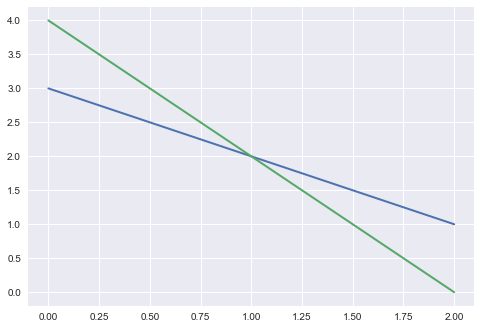

In [20]:
f1 =  lambda x: 3 - x
f2 =  lambda x: 4 - 2 * x
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
ax.plot(x, f1(x) , linewidth= 2)
ax.plot(x, f2(x) , linewidth= 2)

##### More Rows than Columns

Next, consider the case where $A$ is not a square matrix, and the number of rows exceed the number of columns ($m > n$). This is the case that applies to OLS regression in econometric analysis: the number of observations $m$ is typically much higher than the number of regressors ($n$). 

In this case, it is *very unlikely that a solution to $Ax = b$ exists*. To get some intuition, let $m = 3$ and $n = 2$, and let  

\begin{equation}
\begin{split}A
=
\left[
\begin{array}{cc}
    1 &  0 \\
    0 &  1  \\
    0 &  0 
\end{array}
\right]
\end{split}
\end{equation} 

Hence, the column vectors of $A$ are two of the canonical basis vectors; we therefore know that the columns are linearly independent. 

However, the span of $A$ contains only vectors $y \in \mathbb{R}^3$ such that $y_3 = 0$. In other words, the span of $A$ is a two-dimensional plane in the three-dimensional space $\mathbb{R}^3$ (compare figure), and thus the vast majority of points in $\mathbb{R}^3$ is not in the span of $A$. 

Therefore, for an arbitrary $b$, it is highly unlikely that we can find a sequence of coefficients (i.e. a vector) $x$ such that the linear combination $Ax$ gives us $b$.

In [21]:
## figure in class
#
#
#
#
#
#
#
#
#
#
#
#

As you may recall from linear regression, when doing OLS we do not aim to find an exact solution, but instead compute the $x$ that minimizes the residuals. Using matrix notation and the vector norm, one way to express this is to minimize
\begin{equation}
    ||\ b - Ax\ ||
\end{equation}

which is the distance between $y$ and $Ax$. This results in the *best approximation* for $x$:

\begin{equation}
    \hat{x} = (A'A)^{-1} A'b.
\end{equation}


--------------------------------------------------------------------------------------------------------------------------------
<a id ='trile'></a>

## Solving Triangular Linear Systems

For the remainder of this class, we focus on SLEs with square matrices. In order to derive the common popular approach to solving general SLEs, we first look at how to solve *triangular* SLEs.

#### Forward substitution

Suppose $A$ is an *lower triangular* square matrix; hence the SLE has the following form:

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccccc}
    a_{11} & 0 & 0 & \cdots & 0 \\
    a_{21} & a_{22} & 0 & \cdots & 0 \\
    \vdots & \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & a_{n3} &\cdots & a_{nn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
 = 
\left[
\begin{array}{c}
    b_{1}  \\
    \vdots \\
    b_{n} 
\end{array}
\right]
\end{split}
\end{equation} 

It is easy to see that $a_{11} x_1 = b_1$, and hence

\begin{equation}
    x_1 = \frac{b_1}{a_{11}}
\end{equation}

Next, we have $a_{21} x_1 + a_{22} x_2 = b_2$, and hence, knowing $x_1$, we can compute $x_2$ *recursively* as 

\begin{equation}
    x_2 = \frac{b_2 - a_{21}x_1}{a_{22}}
\end{equation}

We can continue this logic all the way to $x_{n}$ (compare Miranda & Fackler, p. 8). A general formula for $x_i$ is given by:

\begin{equation}
    x_i = \frac{b_i - \sum_{j = 1}^{i - 1} a_{ij}x_j}{a_{ii}}
\end{equation}

This way of computing the elements of $x$ in a lower triangular system of equations recursively is called **forward-substitution**. It is straightforward to implement in Python.

In [22]:
def forward_sub(A, b):
    """
    Implements the forward-substitution algorithm to solve a lower triangular system of equations
    """
    n, m = A.shape
    
    assert n == m, "A must be a square matrix"
    
    x = np.zeros(n)
    for i in range(n):
        
        summ = 0
        for j in range(i):
            summ += A[i, j] * x[j]
        
        x[i] = (b[i] - summ) / A[i, i]   
    
    return x

In [23]:
## Example
A = np.array([[1, 0, 0],
              [4, 5, 0],
              [7, 8, 9]])

b = np.array([1, 2, 3]) 

## solve system
x = forward_sub(A, b)
print( x )

[ 1.         -0.4        -0.08888889]


#### Backward substitution

If $A$ is an *upper triangular matrix*, we can use *backward-substitution*, which works analogously to forward-substitution. I leave both the derivation and numerical implementation to this week's problem set.

--------------------------------------------------------------------------------------------------------------------------------
<a id ='lufac'></a>

### LU Factorization using Gaussian Elimination

Let $L$ denote a *lower triangular* square matrix:

\begin{equation}L =
\left[
\begin{array}{ccccc}
    a_{11} & 0 & 0 & \cdots & 0 \\
    a_{21} & a_{22} & 0 & \cdots & 0 \\
    \vdots & \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & a_{n3} &\cdots & a_{nn}
\end{array}
\right]\end{equation}

Similarly, let $U$ denote an *upper triangular* square matrix:

\begin{equation}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{equation}

Gaussian elimination is an algorithm to factor any square matrix into the form 

\begin{equation}
 A = \tilde{L}U,
\end{equation}

where $\tilde{L}$ is a *permuted* lower triangular matrix.

The key idea of Gaussian elimination is that you can *subtract multiples of one row of a linear equation from another row without altering the solution of the linear equation*. Similarly, you can *interchange two rows of a linear solution*, again without altering the solution.  

#### Simple Example

As an example, consider a market where the inverse supply function is given by 

\begin{align}
    p^s = c + d q,
\end{align}

and the inverse demand function is given by

\begin{align}
    p^d = a - b q.
\end{align}


In equilibrium, $p^d = p^d = p$, and solving for $q$ gives 

\begin{align}
    q = \frac{a + c}{b - d}.
\end{align}

Note that we can write the market in equilibrium as a system of two linear equations in two unknowns:

\begin{align}
    p + b q &= a \\
    p - d q &= c
\end{align}
or

\begin{equation}
\left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right] =
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{equation}




Let 

\begin{equation}
A \equiv 
\left[
\begin{array}{cc}
    1 & b \\
    1 & - d
\end{array}
\right]
\end{equation}

and recall that $ A = IA$, where $I$ is the identity matrix:

\begin{equation}
A = 
\left[
\begin{array}{cc}
    1 & 0 \\
    0 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\end{equation}

The idea of Gaussian elimination is to start with this expression and then go through each column of $A$, transforming it such that the elements below the diagonal are zero. 

In this simple example, there is only one step: we need to transform the first column of $A$. We can do this by subtracting $1$ times the first row from the second row, which gives us an upper triangular matrix $U$:

\begin{equation}
 U =
 \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b 
\end{array}
\right]
\end{equation}


In order to keep the equality above, we update the identity matrix by the coefficient $1$:

\begin{equation}
A = \left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right]
\equiv LU
\end{equation}

It is easy to verify that the equality still holds.

Why is it useful to write $A$ as $LU$, and hence why do we need Gaussian elimination? Going back to our system of linear equations, let's make the following substitutions:

\begin{equation}
Ax = LUx = L(Ux) = Ly = b
\end{equation}

As we will see, this is easy to solve. Start with $Ly = b$. In our example above:

\begin{equation}
\left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{equation}

From this, it is easy to see that $y_1 = a$ and

\begin{equation}
    y_1 + y_2 = c\ \Rightarrow\ y_2 = c - a.
\end{equation}

Hence, we have a solution for $y$ above. Recall that we had defined $Ux = y$ or

\begin{equation}
 \begin{split}
\left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right] \left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] =
\left[
\begin{array}{c}
    a \\
    c - a \\
\end{array}
\right]
\end{split}
\end{equation}

From this, it follows that

\begin{equation}
q  (- d - b) = c - a
\end{equation}
and
\begin{equation}
p + bq = a.
\end{equation}


Rearranging gives the solution

\begin{equation}
q  = \frac{a - c}{b + d}, \ p = a - b \frac{a - c}{b + d},
\end{equation}

which equals the solution found above.

#### Gaussian Elimination with Pivoting

Gaussian elimination as described above can lead to inaccurate results on a computer due to roundoff errors, which we discussed in the previous lecture. Roundoff errors can be a problem if the elements on the diagonal of matrix $A$ are very small. 

A remedy to this problem is *pivoting*, that is, interchanging rows during Gaussian elimination, in order to make the diagonal elements as large as possible (in absolute values).

The example in Miranda and Fackler, section 2.5, illustrates the problem and gives an intuition for the why pivoting works.

In [24]:
##### See classroom notes and M&F section 2.5



















### Summary

Before moving to solving SLEs in Python, let's summarize the key insights of this section:

1. A SLE with a lower or upper triangular matrix can be easily solved using forward or backward substitution, respectively.


2. An arbitrary matrix $A$ can be factorized into $A = \tilde{L} U$, where $U$ is an upper triangular matrix and $\tilde{L}$ is a permuted lower triangular matrix, using Gaussian elimination. We can then use a combination of forward and backward substitution to solve the system.

3. There are different ways to implement Gaussian elimination. In practice, Python uses a variant called $PA = LU$ factorization (see appendix), which includes partial pivoting. 


--------------------------------------------------------------------------------------------------------------------------------

## Solving a system of linear equations in Python

All the steps above - Gaussian elimination, forward- and backward substitution - are implemented in one Python function, Scipy's **linalg.solve** function. Here are some examples:

In [25]:
a, b, c, d = 5, 0.4, 0, 0.3

A = np.array([[1, b], [1, -d]])
y = np.array([[a], [c]])

scipy.linalg.solve(A, y)

array([[ 2.14285714],
       [ 7.14285714]])

In [26]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([1, 2, 3]) 

scipy.linalg.solve(A, b)

array([ -3.33333333e-01,   6.66666667e-01,   3.17206578e-17])

To illustrate that LU factorization is a faster way to solve a SLE for large matrices than using the inverse, we can use Numpy's **random.uniform** function to create a large ($n = 500$) square matrix $A$ and vector $b$, both with random elements (here between 0 and 5). A quick way to measure the running time of a piece of code is Jupyter notebook's **%%timeit** "magic". 

In [27]:
A = np.random.uniform(0,5,(500,500))
b = np.random.uniform(0,5,500)

In [28]:
%timeit -r1 -n1 np.linalg.solve(A, b)

1 loop, best of 1: 61.5 ms per loop


In [29]:
%timeit -r1 -n1 scipy.linalg.solve(A, b)

1 loop, best of 1: 72.1 ms per loop


In [30]:
%timeit -r1 -n1 np.linalg.inv(A) @ b

1 loop, best of 1: 110 ms per loop


--------------------------------------------------------------------------------------------------------------------------------
<a id ='ill'></a>

### Ill-conditioned Matrices

A matrix $A$ is said to be *ill-conditioned* if in the SLE $Ax =b$, a small perturbation in $b$ or in $A$ induces a large change in $x$. 

Recall that most real numbers, when represented as floating point numbers, are approximated by DP numbers. Hence, for an ill-conditioned matrix, small roundoff errors in $b$ can lead to large errors in the computed solution vector $x$.  

A notorious example of an ill-conditioned matrix is the so-called *Vandermonde* matrix:

\begin{equation}A =
\left[
\begin{array}{ccccc}
    a_{1}^0 & a_{1}^1 & a_{1}^2 &\cdots & a_{1}^{n-1} \\
    a_{2}^0 & a_{2}^1 & a_{2}^2 &\cdots & a_{2}^{n-1} \\
    \vdots & \vdots &  & \vdots \\
    a_{n}^0 & a_{n}^1 & a_{n}^2 &\cdots & a_{n}^{n-1}
\end{array}
\right]\end{equation}

For $a_j = j$ and $n = 5$, we get:

In [31]:
n = 5
A = np.array([i**j for i in range(1,n+1) for j in range(0, n)] )
A.shape = (n, n)
print(A)

[[  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]
 [  1   5  25 125 625]]


To illustrate the pitfalls of an ill-conditioned matrix, consider solving $Ax =b$ where $A$ is a Vandermonde matrix and $b$ is set such that the solution vector $x$ consists of only of ones. E.g. if $n = 5$, under exact arithmetic, $x = [1, 1, 1, 1, 1]'$ and so on. Below, we solve the system for different values of $n$.

In [32]:
def vm(n):
    ## define matrix
    A = np.array([i**j for i in range(1,n+1) for j in range(0, n)] )
    A.shape = (n, n)
    ## 
    b = A @ np.ones(n)
    ## solve SLE
    x = np.linalg.solve(A, b)
    
    return x, A

In [33]:
n = 5
x, A = vm(n)
print("For n = {}, x = {}".format(n, x) )
print("For n = {}, the condition number is {}".format(n, np.linalg.cond(A)))

For n = 5, x = [ 1.  1.  1.  1.  1.]
For n = 5, the condition number is 26169.68797063433


In [34]:
n = 10
x, A = vm(n)
print("For n = {}, x = {}".format(n, x) )
print("For n = {}, the condition number is {}".format(n, np.linalg.cond(A)))

For n = 10, x = [ 1.00000064  0.99999871  1.00000078  0.99999993  0.99999989  1.00000005
  0.99999999  1.          1.          1.        ]
For n = 10, the condition number is 2106245945721.575


In [35]:
n = 15
x, A = vm(n)
print("For n = {}, x = {}".format(n, x) )
print("For n = {}, the condition number is {}".format(n, np.linalg.cond(A)))

For n = 15, x = [  1.23061043e+04  -3.93051732e+04   5.31333157e+04  -4.09524104e+04
   2.03382320e+04  -6.93956632e+03   1.69049953e+03  -2.98555551e+02
   4.00433004e+01  -2.73635796e+00   1.25925409e+00   9.87316999e-01
   1.00041455e+00   9.99991879e-01   1.00000007e+00]
For n = 15, the condition number is 9.095497295485408e+20


As we can see, for larger $n$, the solution vector computed numerically is very different from the exact solution, and hence the approximation error is large.

Above, we also compute the *condition number* $\kappa \ge 1$ (using Numpy's **linalg.cond** function) which is an indicator for an ill-conditioned matrix: the greater $\kappa$, the more severe is ill-conditioning and hence the lower is the accuracy of the computed solution. 



Without going into further details, the intuition when a matrix in an SLE is ill-conditioned is that it is close to a singular matrix. 

That said, it is important to note that the size of the determinant of a matrix - which indicates whether a matrix is singular in case it is zero - is *not* a good indicator whether a matrix is ill-conditioned or not.

--------------------------------------------------------------------------------------------------------------------------------
<a id ='sparse'></a>

## Sparse Matrices

A matrix is called *sparse* if it contains mainly zeros. Since it would be a waste of memory and processing power to store and process a lot of zeros when doing matrix operations, most programming languages, including Python/Scipy, have special formats for sparse matrices. 

The following example is taken from the Scipy documentation on sparse matrices: https://docs.scipy.org/doc/scipy/reference/sparse.html#example-1. It illustrates how to define a sparse matrices in Scipy:

In [36]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

In [37]:
A = lil_matrix((1000, 1000))
A[0, :100] = np.random.rand(100)
A[1, 100:200] = A[0, :100]
A.setdiag(np.random.rand(1000))

In [38]:
A = A.tocsr()
b = np.random.rand(1000)

print( type(A) )

<class 'scipy.sparse.csr.csr_matrix'>


Solving an SLE where $A$ is defined as a sparse matrix is considerably faster than when $A$ is a full matrix:

In [39]:
%timeit -r1 -n1 spsolve(A, b)

1 loop, best of 1: 2.65 ms per loop


In [40]:
A_ = A.toarray()
%timeit -r1 -n1  np.linalg.solve(A_, b)

1 loop, best of 1: 118 ms per loop


In [41]:
## check if both give the same result
x = spsolve(A, b)
x_ = np.linalg.solve(A_, b)
np.allclose(x, x_)

True

Moreover, as suggested above, the matrix takes much less storage space when it is stored as a sparse matrix:

In [42]:
sys.getsizeof(A)

56

In [43]:
sys.getsizeof(A_)

8000112

Despite these advantages of using sparse matrices, there are also downsides (cp. M&F, appendix 2B). 

--------------------------------------------------------------------------------------------------------------------------------

<a id ='iterative'></a>

### Iterative Methods

Many important algorithms in numerical analysis, some of which we will learn about during this course, are based on  *iteration*. The basic idea of iterative methods is to generate a sequence of approximations to the object of interest, in case of SLEs the solution vector $x$. 

Ideally, these approximations become more and more precise with an increasing number of iterations. However, it is important to emphasize that iterative methods, in contrast to direct methods like solving SLEs with LU factorization, do not yield an exact solution.

On a very general level, iterative methods can be formalized by the following iteration rule:

\begin{equation}
    x^{(k+1)} = g( x^{(k)} ).
\end{equation}

$k$ here is an indicator counting the number of iterations. Hence, in words, the value for $x$ in the $k+1$-iteration is obtained by applying function $g$ on the value for $x$ in the $k$-iteration. Naturally, the functional form of $g$ depends on the problem you want analyze. 

For more concreteness, let us go back to the solving the SLE. Starting at $Ax = b$, first note that rearranging and adding $Qx$ on both sides, where $Q$ is also a square matrix of order $n$ gives:

\begin{equation}
    Qx = Qx + b - Ax\ \Rightarrow \ Qx = b + (Q - A)x
\end{equation}

Multiplying both sides with the inverse of $Q$, we get:

\begin{equation}
    x = Q^{-1} b + (I - Q^{-1} A)x
\end{equation}

This will be our iteration rule. In other words, the function $g$ above is given by the RHS, $Q^{-1} b + (I - Q^{-1} A)x$, and hence

\begin{equation}
    x^{(k+1)} = g( x^{(k)} ) = Q^{-1} b + (I - Q^{-1} A)x^{(k)}.
\end{equation}

Recall that taking the inverse of a matrix can be computationally demanding, in particular for large matrices. Hence, in order for this iteration rule to be useful, we need $Q$ to be easily invertible. One way to achieve this is to require $Q$ to be diagonal or triangular. 

This is the idea of the **Gauss-Jacobi** and **Gauss-Seidel** methods, respectively:
- the Gauss-Jacobi method set $Q$ equal to to a diagonal matrix with the diagonal elements of $A$; 
- the Gauss-Seidel method forms $Q$ from upper triangular elements of $A$. 

In Python, the **diag** and **triu** functions are useful when implementing these algorithms (the former has to be applied twice):

In [44]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])
Q = np.diag( np.diag(A) )
print(Q)

[[1 0 0]
 [0 5 0]
 [0 0 9]]


In [45]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])
Q = np.triu(A)
print(Q)

[[1 2 4]
 [0 5 6]
 [0 0 9]]


The following piece of code implements the Gauss-Seidel method:

In [46]:
def gauss_seidel(A, b, x0):
    """ 
    Implements the Gauss-Seidel method with a over-relaxation parameter
    """
    eps = 1
    tol = 1e-8
    it = 0
    maxit = 100

    x = x0
    Q = np.triu(A)
    Q_inv = np.linalg.inv(Q)
    
    while eps > tol and it < maxit:
        it += 1 
        x_new = Q_inv @ b + ( np.eye(len(b)) - Q_inv @ A) @ x
        eps = np.linalg.norm(x_new - x)
        x = x_new
        
    return x        

In [47]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])
x0 = np.array([-0.33, 0.66, 0]) 
b = np.array([1, 2, 3]) 

print( gauss_seidel(A, b, x0) )

[ -1.33439602e+44  -9.47028130e+42   3.80950410e+43]


Applying the Gauss-Seidel method on our example from above, we see that the algorithm does not converge, even if we choose an initial $x$ close to the exact solution (which we know in this case). This is a drawback of using iterative methods: convergence to a good approximation is not guarantueed.

In the case of solving an SLE, it can be shown that we get convergence if the following condition holds:

\begin{equation}
    || I - Q^{-1} A || < 1.
\end{equation}

For now, we will not look at why this is the case, but just take this property as a given. We can evaluate this expression for our example and find that the condition is not satisfied:

In [48]:
print( np.linalg.norm(np.eye(len(b)) - np.linalg.inv(np.triu(A)) @ A) )

3.55867918347


To consider an example where convergence is guaranteed, *independent from the starting value for* $x$, modify $A$ by increasing the elements on the diagonal (cp. Miranda and Fackler for why this works):

In [49]:
A = np.array([[10, 2, 4],
              [4, 15, 6],
              [7, 8, 20]])

np.linalg.norm(np.eye(len(b)) - np.linalg.inv(np.triu(A)) @ A)

0.60651756409485424

The condition above is satisfied; applying the Gauss-Seidel algorithm finds a solution: 

In [50]:
x0 = np.array([1, 1, 1]) 
b = np.array([1, 2, 3]) 
print( gauss_seidel(A, b, x0) )

[ 0.04275093  0.08085502  0.10269517]


You can verify that this solution is found for different values for the starting value **x0**. 

When should you use iterative methods rather than computing an exact solution to a SLE? A rule of thumb is for large matrices, in particular if they are sparse, iterative methods may be a faster way to find $x$. For this course, all problems that involve solving a SLE will be of moderate size, hence LU factorization will do fine.